In [11]:
#using libraries
import pandas as pd
from sklearn import linear_model
from math import sqrt

df = pd.read_csv("2019.csv")

trainData = df.head(100)
testData = df.tail(56)

X = trainData[['GDP per capita','Freedom to make life choices']]
Y = trainData['Score']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

testData = pd.DataFrame(df.tail(56))

squareError = 0


dim = len(trainData)
for i in range(len(testData)):
    gdp = testData.loc[[i + dim]].get("GDP per capita").to_numpy()[0]
    happines = testData.loc[[i + dim]].get("Freedom to make life choices").to_numpy()[0]
    realScore = testData.loc[[i + dim]].get("Score").to_numpy()[0]
    computed = regr.predict([[gdp, happines]])[0]
    squareError += (realScore - computed) ** 2
    
print("RMSE ERROR: " + str(sqrt(squareError/len(testData))))
    

Intercept: 
 3.2948100428017066
Coefficients: 
 [1.51160686 2.521292  ]
RMSE ERROR: 0.9014604906329932


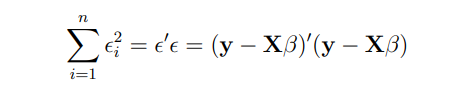

In [12]:
import csv

def multiply(X, Y):
    return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

def subtitute(X, Y):
    return [[X[i][j] - Y[i][j]  for j in range(len(X[0]))] for i in range(len(X))]

def transpose(X):
    return [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]


def getMatrixMinor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def getMatrixDeternminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*getMatrixDeternminant(getMatrixMinor(m,0,c))
    return determinant

def getMatrixInverse(m):
    determinant = getMatrixDeternminant(m)
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

    #find matrix of cofactors
    cofactors = []
    for r in range(len(m)):
        cofactorRow = []
        for c in range(len(m)):
            minor = getMatrixMinor(m,r,c)
            cofactorRow.append(((-1)**(r+c)) * getMatrixDeternminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transpose(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors

def fit(X, Y):
    transposeX = transpose(X)
    return multiply(multiply(getMatrixInverse(multiply(transposeX, X)), transposeX), Y)

def getIntercept(X, Y, W):
    return multiply(transpose(subtitute(Y, multiply(X, W))), subtitute(Y, multiply(X, W)))

def predict(inp, coef, inter):
    return inp[0] * coef[0] + inp[1] * coef[1] + inter

data = []

with open('2019.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        data.append(row)
        
data.pop(0)

trainData = data[:100]
testData = data[100:]

inputs = []
outputs = []

for i in range(len(trainData)):
    inputs.append([float(trainData[i][3]), float(trainData[i][6])])
    outputs.append([float(trainData[i][2])])

coefficients = fit(inputs, outputs)
intercept = sqrt(getIntercept(inputs, outputs, coefficients)[0][0])/len(trainData)
coefficients = [item for sublist in coefficients for item in sublist]

print('Intercept: \n', intercept)
print('Coefficients: \n', coefficients)

squareError = 0
               
for i in range(len(testData)):
    gdp = float(testData[i][3])
    happines = float(testData[i][6])
    realScore = float(testData[i][2])
    computed = predict([gdp, happines], coefficients, intercept)
    #print("real :", realScore)
    #print("computed :", computed)
    squareError += (realScore - computed) ** 2
               
print("RMSE ERROR: " + str(sqrt(squareError/len(testData))))

Intercept: 
 0.08053276293001668
Coefficients: 
 [3.1628444371925784, 5.5775207272322875]
RMSE ERROR: 1.3516649648048507
